#Challenge 1

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import csv

In [3]:
#!pip install emoji
import emoji

In [4]:
!curl "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt" > turnstile_150606.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  3572k      0 --:--:--  0:00:06 --:--:-- 4030k


In [94]:
### NOTE: THIS WAS A SLOW WAY OF DOING IT
### JON'S SOLUTION BELOW THIS POINT
#f = open('turnstile_150606.txt')
#row_list = []
#try:
#    reader = csv.reader(f)
#    for row in reader:
#        for entry in row:
#            entry = entry.rstrip()
#        row_list.append(row)
#finally:
#    f.close()
#    
#type(entry)
#row_list[:2]

In [5]:
with open('turnstile_150606.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [6]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 
                       'LINENAME', 'DIVISION', 'DATE', 
                       'TIME', 'DESC', 'ENTRIES', 'EXITS']

In [7]:
row_dict = {}
for row in rows:
    row_dict.setdefault(tuple(row[:4]), []).append((row[4:]))

row_dict.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [['NR',
   'BMT',
   '05/30/2015',
   '00:00:00',
   'REGULAR',
   '0005894820',
   '0003283260'],
  ['NR',
   'BMT',
   '05/30/2015',
   '04:00:00',
   'REGULAR',
   '0005894882',
   '0003283282'],
  ['NR',
   'BMT',
   '05/30/2015',
   '08:00:00',
   'REGULAR',
   '0005894902',
   '0003283304'],
  ['NR',
   'BMT',
   '05/30/2015',
   '12:00:00',
   'REGULAR',
   '0005895001',
   '0003283452'],
  ['NR',
   'BMT',
   '05/30/2015',
   '16:00:00',
   'REGULAR',
   '0005895243',
   '0003283728'],
  ['NR',
   'BMT',
   '05/30/2015',
   '20:00:00',
   'REGULAR',
   '0005895570',
   '0003283978'],
  ['NR',
   'BMT',
   '05/31/2015',
   '00:00:00',
   'REGULAR',
   '0005895743',
   '0003284078'],
  ['NR',
   'BMT',
   '05/31/2015',
   '04:00:00',
   'REGULAR',
   '0005895797',
   '0003284094'],
  ['NR',
   'BMT',
   '05/31/2015',
   '08:00:00',
   'REGULAR',
   '0005895818',
   '0003284110'],
  ['NR',
   'BMT',
   '05/31/2015',
   '12:00:00',
   

The required dictionary is stored in row_dict.

# Challenge 2

In [8]:
datetime_cumulative = {}
for stile, readings in row_dict.items():
    for _, _, date, time, _, entries_cum, _ in readings:
        valueTup = (datetime.strptime(' '.join([date, time]), '%m/%d/%Y %H:%M:%S'), int(entries_cum))
        datetime_cumulative.setdefault(stile, []).append(valueTup)
datetime_cumulative.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 5894820),
  (datetime.datetime(2015, 5, 30, 4, 0), 5894882),
  (datetime.datetime(2015, 5, 30, 8, 0), 5894902),
  (datetime.datetime(2015, 5, 30, 12, 0), 5895001),
  (datetime.datetime(2015, 5, 30, 16, 0), 5895243),
  (datetime.datetime(2015, 5, 30, 20, 0), 5895570),
  (datetime.datetime(2015, 5, 31, 0, 0), 5895743),
  (datetime.datetime(2015, 5, 31, 4, 0), 5895797),
  (datetime.datetime(2015, 5, 31, 8, 0), 5895818),
  (datetime.datetime(2015, 5, 31, 12, 0), 5895893),
  (datetime.datetime(2015, 5, 31, 16, 0), 5896098),
  (datetime.datetime(2015, 5, 31, 20, 0), 5896404),
  (datetime.datetime(2015, 6, 1, 0, 0), 5896530),
  (datetime.datetime(2015, 6, 1, 4, 0), 5896539),
  (datetime.datetime(2015, 6, 1, 8, 0), 5896659),
  (datetime.datetime(2015, 6, 1, 12, 0), 5897167),
  (datetime.datetime(2015, 6, 1, 16, 0), 5897623),
  (datetime.datetime(2015, 6, 1, 20, 0), 5898780),
  (datetime.datetime(2015, 6, 2, 

In [11]:
## A good check to do before taking differences (courtesy of Mr. Hanke).
for row in datetime_cumulative.values():
    row = sorted(row)

In [12]:
datetime_absolute = {}
for stile, readings in datetime_cumulative.items():
    for i in range(len(readings) - 1):
        datetime_absolute.setdefault(stile, []).append((readings[i][0], readings[i + 1][1] - readings[i][1]))
datetime_absolute.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 62),
  (datetime.datetime(2015, 5, 30, 4, 0), 20),
  (datetime.datetime(2015, 5, 30, 8, 0), 99),
  (datetime.datetime(2015, 5, 30, 12, 0), 242),
  (datetime.datetime(2015, 5, 30, 16, 0), 327),
  (datetime.datetime(2015, 5, 30, 20, 0), 173),
  (datetime.datetime(2015, 5, 31, 0, 0), 54),
  (datetime.datetime(2015, 5, 31, 4, 0), 21),
  (datetime.datetime(2015, 5, 31, 8, 0), 75),
  (datetime.datetime(2015, 5, 31, 12, 0), 205),
  (datetime.datetime(2015, 5, 31, 16, 0), 306),
  (datetime.datetime(2015, 5, 31, 20, 0), 126),
  (datetime.datetime(2015, 6, 1, 0, 0), 9),
  (datetime.datetime(2015, 6, 1, 4, 0), 120),
  (datetime.datetime(2015, 6, 1, 8, 0), 508),
  (datetime.datetime(2015, 6, 1, 12, 0), 456),
  (datetime.datetime(2015, 6, 1, 16, 0), 1157),
  (datetime.datetime(2015, 6, 1, 20, 0), 387),
  (datetime.datetime(2015, 6, 2, 0, 0), 32),
  (datetime.datetime(2015, 6, 2, 4, 0), 120),
  (datetime.datetime(

In [13]:
# What does EDA stand for?? 
# Exploratory Data Analysis!

counts = []

for _, readings in datetime_absolute.items():
    for stat in readings:
        counts.append(stat[1])
counts.sort()
counts[-50:], counts[:100]

([2507,
  2518,
  2529,
  2530,
  2544,
  2544,
  2549,
  2556,
  2556,
  2598,
  2599,
  2603,
  2605,
  2607,
  2613,
  2625,
  2628,
  2630,
  2634,
  2652,
  2657,
  2683,
  2711,
  2713,
  2723,
  2742,
  2746,
  2749,
  2760,
  2768,
  2769,
  2777,
  2802,
  2805,
  2828,
  2844,
  2853,
  2866,
  2879,
  2912,
  3057,
  3170,
  3240,
  113343,
  113477,
  540997,
  574928,
  943123,
  50331648,
  1541995760],
 [-33554473,
  -2687195,
  -2471433,
  -2161616,
  -894619,
  -574902,
  -540573,
  -450654,
  -247327,
  -219843,
  -164557,
  -113343,
  -113308,
  -72223,
  -69254,
  -41138,
  -25381,
  -12858,
  -8680,
  -2064,
  -1946,
  -1860,
  -1805,
  -1794,
  -1785,
  -1748,
  -1735,
  -1724,
  -1724,
  -1667,
  -1631,
  -1625,
  -1614,
  -1594,
  -1589,
  -1558,
  -1529,
  -1512,
  -1508,
  -1493,
  -1492,
  -1490,
  -1487,
  -1486,
  -1469,
  -1467,
  -1463,
  -1461,
  -1455,
  -1448,
  -1441,
  -1440,
  -1425,
  -1421,
  -1386,
  -1358,
  -1358,
  -1352,
  -1351,
  -1345,
  -

In [14]:
datetime_counts_clean = { stile: [(stamp, entry) 
                                 for stamp, entry in readings 
                                 if 0 <= entry <= 5000] 
                         for stile, readings in datetime_absolute.items()
                        }

datetime_counts_clean.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 62),
  (datetime.datetime(2015, 5, 30, 4, 0), 20),
  (datetime.datetime(2015, 5, 30, 8, 0), 99),
  (datetime.datetime(2015, 5, 30, 12, 0), 242),
  (datetime.datetime(2015, 5, 30, 16, 0), 327),
  (datetime.datetime(2015, 5, 30, 20, 0), 173),
  (datetime.datetime(2015, 5, 31, 0, 0), 54),
  (datetime.datetime(2015, 5, 31, 4, 0), 21),
  (datetime.datetime(2015, 5, 31, 8, 0), 75),
  (datetime.datetime(2015, 5, 31, 12, 0), 205),
  (datetime.datetime(2015, 5, 31, 16, 0), 306),
  (datetime.datetime(2015, 5, 31, 20, 0), 126),
  (datetime.datetime(2015, 6, 1, 0, 0), 9),
  (datetime.datetime(2015, 6, 1, 4, 0), 120),
  (datetime.datetime(2015, 6, 1, 8, 0), 508),
  (datetime.datetime(2015, 6, 1, 12, 0), 456),
  (datetime.datetime(2015, 6, 1, 16, 0), 1157),
  (datetime.datetime(2015, 6, 1, 20, 0), 387),
  (datetime.datetime(2015, 6, 2, 0, 0), 32),
  (datetime.datetime(2015, 6, 2, 4, 0), 120),
  (datetime.datetime(

datetime_counts_clean contains the required dictionary.

# Challenge 3 

In [15]:
daily_counts = {}

for stile, readings in datetime_counts_clean.items():
    daily = {}
    for date, count in readings:
        daily[date.date()] = daily.get(date.date(), 0) + count
    daily_counts[stile] = sorted(daily.items())
daily_counts.items()[:5]

[(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
  [(datetime.date(2015, 5, 30), 923),
   (datetime.date(2015, 5, 31), 787),
   (datetime.date(2015, 6, 1), 2637),
   (datetime.date(2015, 6, 2), 2901),
   (datetime.date(2015, 6, 3), 2748),
   (datetime.date(2015, 6, 4), 2629),
   (datetime.date(2015, 6, 5), 2102)]),
 (('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  [(datetime.date(2015, 5, 30), 12),
   (datetime.date(2015, 5, 31), 5),
   (datetime.date(2015, 6, 1), 3),
   (datetime.date(2015, 6, 2), 5),
   (datetime.date(2015, 6, 3), 3),
   (datetime.date(2015, 6, 4), 9),
   (datetime.date(2015, 6, 5), 3)]),
 (('B014', 'R148', '00-00-01', 'PARKSIDE AVE'),
  [(datetime.date(2015, 5, 30), 1589),
   (datetime.date(2015, 5, 31), 1123),
   (datetime.date(2015, 6, 1), 2053),
   (datetime.date(2015, 6, 2), 2077),
   (datetime.date(2015, 6, 3), 2257),
   (datetime.date(2015, 6, 4), 2108),
   (datetime.date(2015, 6, 5), 2112)]),
 (('A013', 'R081', '01-03-00', '49 ST-7 AVE'),
  [(datetime.date(201

The required dictionary is stored as daily_counts.

#Challenge 4

In [16]:
church_ave = daily_counts.items()[4]
dates, counts = zip(*church_ave[1])
dates, counts

((datetime.date(2015, 5, 30),
  datetime.date(2015, 5, 31),
  datetime.date(2015, 6, 1),
  datetime.date(2015, 6, 2),
  datetime.date(2015, 6, 3),
  datetime.date(2015, 6, 4),
  datetime.date(2015, 6, 5)),
 (1005, 719, 1221, 1293, 1169, 1167, 1140))

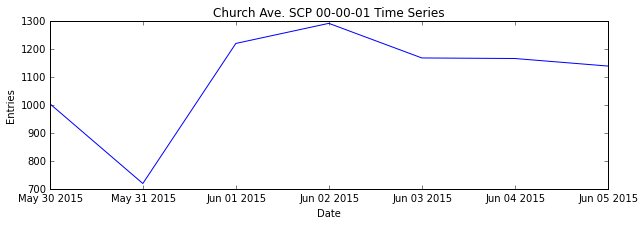

In [17]:
plt.figure(figsize = (10,3))
plt.plot(dates, counts)
plt.title('Church Ave. SCP 00-00-01 Time Series')
plt.xlabel('Date')
plt.ylabel('Entries')

Booya! A time series for the given SCP for the week of Jun 20. 

In [18]:
print emoji.emojize(':sunglasses:'*10, use_aliases = True)

😎😎😎😎😎😎😎😎😎😎


# Challenge 5

I will be working under the assumption that we want daily time series from here on out.

In [20]:
station_dict_cum = {}
for row in rows:
    valueTup = (datetime.strptime(row[6] + row[7], '%m/%d/%Y%X'), int(row[9]))
    station_dict_cum.setdefault(tuple(row[:2] + [row[3]]), []).append(valueTup)

station_dict_cum.items()[0]

(('N325A', 'R218', 'ELMHURST AVE'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 676220),
  (datetime.datetime(2015, 5, 30, 4, 0), 676224),
  (datetime.datetime(2015, 5, 30, 8, 0), 676250),
  (datetime.datetime(2015, 5, 30, 12, 0), 676307),
  (datetime.datetime(2015, 5, 30, 16, 0), 676348),
  (datetime.datetime(2015, 5, 30, 20, 0), 676381),
  (datetime.datetime(2015, 5, 31, 0, 0), 676384),
  (datetime.datetime(2015, 5, 31, 4, 0), 676386),
  (datetime.datetime(2015, 5, 31, 8, 0), 676402),
  (datetime.datetime(2015, 5, 31, 12, 0), 676443),
  (datetime.datetime(2015, 5, 31, 16, 0), 676478),
  (datetime.datetime(2015, 5, 31, 20, 0), 676499),
  (datetime.datetime(2015, 6, 1, 0, 0), 676503),
  (datetime.datetime(2015, 6, 1, 4, 0), 676506),
  (datetime.datetime(2015, 6, 1, 8, 0), 676591),
  (datetime.datetime(2015, 6, 1, 12, 0), 676726),
  (datetime.datetime(2015, 6, 1, 16, 0), 676771),
  (datetime.datetime(2015, 6, 1, 20, 0), 676790),
  (datetime.datetime(2015, 6, 2, 0, 0), 676803),
  (datetime.

In [24]:
station_dict = {}
for station, readings in station_dict_cum.items():
    for i in range(len(readings) - 1):
        station_dict.setdefault(station, []).append((readings[i][0], readings[i + 1][1] - readings[i][1]))
station_dict_clean = {station: [(stamp, entry) 
                                for stamp, entry in readings 
                                if 0 <= entry <= 5000] 
                      for station, readings in station_dict.items()}

station_dict_clean.items()[0]

(('N325A', 'R218', 'ELMHURST AVE'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 4),
  (datetime.datetime(2015, 5, 30, 4, 0), 26),
  (datetime.datetime(2015, 5, 30, 8, 0), 57),
  (datetime.datetime(2015, 5, 30, 12, 0), 41),
  (datetime.datetime(2015, 5, 30, 16, 0), 33),
  (datetime.datetime(2015, 5, 30, 20, 0), 3),
  (datetime.datetime(2015, 5, 31, 0, 0), 2),
  (datetime.datetime(2015, 5, 31, 4, 0), 16),
  (datetime.datetime(2015, 5, 31, 8, 0), 41),
  (datetime.datetime(2015, 5, 31, 12, 0), 35),
  (datetime.datetime(2015, 5, 31, 16, 0), 21),
  (datetime.datetime(2015, 5, 31, 20, 0), 4),
  (datetime.datetime(2015, 6, 1, 0, 0), 3),
  (datetime.datetime(2015, 6, 1, 4, 0), 85),
  (datetime.datetime(2015, 6, 1, 8, 0), 135),
  (datetime.datetime(2015, 6, 1, 12, 0), 45),
  (datetime.datetime(2015, 6, 1, 16, 0), 19),
  (datetime.datetime(2015, 6, 1, 20, 0), 13),
  (datetime.datetime(2015, 6, 2, 0, 0), 7),
  (datetime.datetime(2015, 6, 2, 4, 0), 64),
  (datetime.datetime(2015, 6, 2, 8, 0), 18),
  (

In [25]:
station_dict_daily_counts = {}

for station, readings in station_dict_clean.items():
    daily_dict = {}
    for stamp, entry in readings:
        date = stamp.date()
        daily_dict[date] = daily_dict.get(date, 0) + entry
    station_dict_daily_counts[station] = sorted(daily_dict.items())
station_dict_daily_counts.items()[:5]

[(('N325A', 'R218', 'ELMHURST AVE'),
  [(datetime.date(2015, 5, 30), 9971),
   (datetime.date(2015, 5, 31), 8094),
   (datetime.date(2015, 6, 1), 13762),
   (datetime.date(2015, 6, 2), 13839),
   (datetime.date(2015, 6, 3), 14566),
   (datetime.date(2015, 6, 4), 13844),
   (datetime.date(2015, 6, 5), 13688)]),
 (('R137', 'R031', '34 ST-PENN STA'),
  [(datetime.date(2015, 5, 30), 0),
   (datetime.date(2015, 5, 31), 0),
   (datetime.date(2015, 6, 1), 3882),
   (datetime.date(2015, 6, 2), 4277),
   (datetime.date(2015, 6, 3), 4168),
   (datetime.date(2015, 6, 4), 4120),
   (datetime.date(2015, 6, 5), 3549)]),
 (('R414', 'R162', 'ELDER AVE'),
  [(datetime.date(2015, 5, 30), 4894),
   (datetime.date(2015, 5, 31), 3295),
   (datetime.date(2015, 6, 1), 6653),
   (datetime.date(2015, 6, 2), 6642),
   (datetime.date(2015, 6, 3), 6964),
   (datetime.date(2015, 6, 4), 6335),
   (datetime.date(2015, 6, 5), 6703)]),
 (('D012', 'R395', 'KINGS HIGHWAY'),
  [(datetime.date(2015, 5, 30), 2263),
   (dat

The required dictionary of daily counts by station is stored in station_dict_daily_counts.

# Challenge 6

In [32]:
station_daily_counts = {}
for station_section, readings in station_dict_daily_counts.items():
    station = station_section[2]
    for stamp, count in readings:
        if station in station_daily_counts.keys():
            station_daily_counts[station][stamp] = station_daily_counts[station].get(stamp,0) + count
        else: 
            station_daily_counts[station] = {stamp: count}

for station, stamp_dict in station_daily_counts.items():
    station_daily_counts[station] = sorted(stamp_dict.items())
station_daily_counts.items()[5:15]

[('57 ST-7 AVE',
  [(datetime.date(2015, 5, 30), 15693),
   (datetime.date(2015, 5, 31), 12620),
   (datetime.date(2015, 6, 1), 21177),
   (datetime.date(2015, 6, 2), 23157),
   (datetime.date(2015, 6, 3), 23864),
   (datetime.date(2015, 6, 4), 24211),
   (datetime.date(2015, 6, 5), 19141)]),
 ('52 ST-LINCOLN',
  [(datetime.date(2015, 5, 30), 5029),
   (datetime.date(2015, 5, 31), 3689),
   (datetime.date(2015, 6, 1), 6890),
   (datetime.date(2015, 6, 2), 7073),
   (datetime.date(2015, 6, 3), 7192),
   (datetime.date(2015, 6, 4), 6777),
   (datetime.date(2015, 6, 5), 6751)]),
 ('NASSAU AV',
  [(datetime.date(2015, 5, 30), 6458),
   (datetime.date(2015, 5, 31), 4728),
   (datetime.date(2015, 6, 1), 8980),
   (datetime.date(2015, 6, 2), 9359),
   (datetime.date(2015, 6, 3), 9384),
   (datetime.date(2015, 6, 4), 8699),
   (datetime.date(2015, 6, 5), 13456)]),
 ('NOSTRAND AVE',
  [(datetime.date(2015, 5, 30), 17019),
   (datetime.date(2015, 5, 31), 12011),
   (datetime.date(2015, 6, 1), 21

The required dictionary is now stored within station_daily_counts.

# Challenge 7

In [81]:
nostrand = station_daily_counts.items()[8][1]
dates2, counts2 = zip(*nostrand)
dates2

(datetime.date(2015, 5, 30),
 datetime.date(2015, 5, 31),
 datetime.date(2015, 6, 1),
 datetime.date(2015, 6, 2),
 datetime.date(2015, 6, 3),
 datetime.date(2015, 6, 4),
 datetime.date(2015, 6, 5))

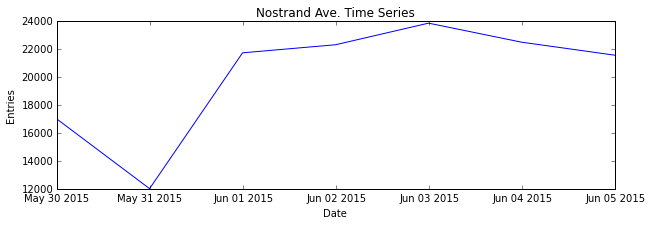

In [55]:
plt.figure(figsize = (10,3))
plt.plot(dates2, counts2)
plt.title('Nostrand Ave. Time Series')
plt.xlabel('Date')
plt.ylabel('Entries')

This is a time series plot for the entire Nostrand Ave. train station entrances over the week of May 30, 2015.

# Challenge 8

In [56]:
#!curl "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150530.txt" > turnstile_150530.txt
#!curl "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150523.txt" > turnstile_150523.txt
#!curl "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150516.txt" > turnstile_150516.txt


The following block of code essentially repeats the construction of the previous example four times, storing all four time series (one for each week) as a list of dictionaries. I can imagine there is a much more elegant way of doing this.

In [100]:
rows_array = []

with open('turnstile_150516.txt') as f1:
    reader = csv.reader(f1)
    rows_array.append([[cell.strip() for cell in row] for row in reader])

with open('turnstile_150523.txt') as f2:
    reader = csv.reader(f2)
    rows_array.append([[cell.strip() for cell in row] for row in reader])

with open('turnstile_150530.txt') as f3:
    reader = csv.reader(f3)
    rows_array.append([[cell.strip() for cell in row] for row in reader])

with open('turnstile_150606.txt') as f4:
    reader = csv.reader(f4)
    rows_array.append([[cell.strip() for cell in row] for row in reader])

for i in range(len(rows_array)):
    assert rows_array[i].pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 
                       'LINENAME', 'DIVISION', 'DATE', 
                       'TIME', 'DESC', 'ENTRIES', 'EXITS']

station_dict_cum_array = []
for i in range(len(rows_array)):
    station_dict_cum_array.append({})
    for row in rows_array[i]:
        valueTup = (datetime.strptime(row[6] + row[7], '%m/%d/%Y%X'), int(row[9]))
        station_dict_cum_array[i].setdefault(tuple(row[:2] + [row[3]]), []).append(valueTup)

station_dict_array = []
station_dict_clean_array = []
for i in range(len(rows_array)):
    station_dict_array.append({})
    for station, readings in station_dict_cum_array[i].items():
        for j in range(len(readings) - 1):
            station_dict_array[i].setdefault(station, []).append((readings[j][0], readings[j + 1][1] - readings[j][1]))
    station_dict_clean_array.append({station: [(stamp, entry) 
                                for stamp, entry in readings 
                                if 0 <= entry <= 5000] 
                      for station, readings in station_dict_array[i].items()})

    
station_dict_daily_counts_array = []
for i in range(len(rows_array)):
    station_dict_daily_counts_array.append({})
    for station, readings in station_dict_clean_array[i].items():
        daily_dict = {}
        for stamp, entry in readings:
            date = stamp.weekday()
            daily_dict[date] = daily_dict.get(date, 0) + entry
        station_dict_daily_counts_array[i][station] = sorted(daily_dict.items())
    
station_daily_counts_array = []
for i in range(len(rows_array)):
    station_daily_counts_array.append({})
    for station_section, readings in station_dict_daily_counts_array[i].items():
        station = station_section[2]
        for stamp, count in readings:
            if station in station_daily_counts_array[i].keys():
                station_daily_counts_array[i][station][stamp] = station_daily_counts_array[i][station].get(stamp,0) + count
            else: 
                station_daily_counts_array[i][station] = {stamp: count}
    for station, stamp_dict in station_daily_counts_array[i].items():
        station_daily_counts_array[i][station] = sorted(stamp_dict.items())
    


Now to set up the plotting arrays:

In [113]:
station_daily_counts_array[0]

{'1 AVE': [(0, 21934),
  (1, 23125),
  (2, 24207),
  (3, 23983),
  (4, 20166),
  (5, 12),
  (6, 12)],
 '103 ST': [(0, 27112),
  (1, 28635),
  (2, 28701),
  (3, 29316),
  (4, 27050),
  (5, 18167),
  (6, 14121)],
 '103 ST-CORONA': [(0, 19897),
  (1, 20627),
  (2, 20964),
  (3, 20851),
  (4, 20088),
  (5, 15638),
  (6, 11860)],
 '104 ST': [(0, 2409),
  (1, 2497),
  (2, 2475),
  (3, 2462),
  (4, 2371),
  (5, 1472),
  (6, 1099)],
 '110 ST': [(0, 15027),
  (1, 15520),
  (2, 16067),
  (3, 16106),
  (4, 14873),
  (5, 9183),
  (6, 7002)],
 '110 ST-CATHEDRL': [(0, 13178),
  (1, 14322),
  (2, 14715),
  (3, 14534),
  (4, 14182),
  (5, 9156),
  (6, 7076)],
 '110 ST-CPN': [(0, 10165),
  (1, 10754),
  (2, 10881),
  (3, 10303),
  (4, 9838),
  (5, 7710),
  (6, 6150)],
 '111 ST': [(0, 14105),
  (1, 14633),
  (2, 14532),
  (3, 14490),
  (4, 13893),
  (5, 10972),
  (6, 9020)],
 '116 ST': [(0, 36777),
  (1, 38635),
  (2, 39175),
  (3, 39002),
  (4, 37214),
  (5, 25445),
  (6, 21035)],
 '116 ST-COLUMBIA': [

In [112]:
dates_array = []
counts_array = []
for i in range(len(rows_array)):
    dates, counts = zip(*station_daily_counts_array[i].items()[8][1])
    dates_array.append(dates)
    counts_array.append(counts)

And finally, to plot all four time series, overlaid on one another.

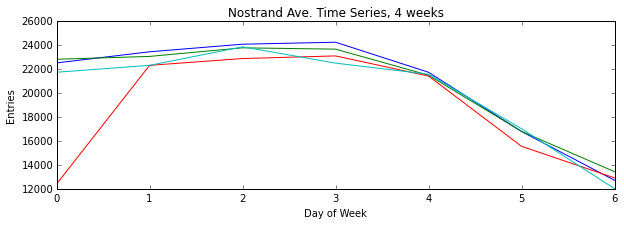

In [111]:
plt.figure(figsize = (10,3))
for i in range(len(rows_array)):
    plt.plot(dates_array[i], counts_array[i])
    plt.title('Nostrand Ave. Time Series, ' + str(len(rows_array)) + ' weeks')
plt.xlabel('Day of Week')
plt.ylabel('Entries')

Ta da! Not the prettiest way of getting it done, but satisfying to get a believable picture. Wonder what was going on that one Monday morning though ...

#Challenge 9 

Here we'll use the same four week span as in Challenge 8, as well as the same dictionaries we have already constructed.

In [120]:
total_entries_dict = {}
for i in range(len(rows_array)):
    for station, readings in station_daily_counts_array[i].items():
        total_entries_dict[station] = total_entries_dict.get(station, 0) + reduce(lambda x, y: x + y, zip(*readings)[1])
final_counts = sorted(total_entries_dict.items(), key = lambda x: x[1])
final_counts[:20], final_counts[-20:]

([('ORCHARD BEACH', 4538),
  ('BEACH 105 ST', 7478),
  ('BROAD CHANNEL', 8111),
  ('BEACH 98 ST', 14957),
  ('BEACH 44 ST', 16169),
  ('PATH WTC 2', 16362),
  ('ROCKAWAY PK 116', 18340),
  ('E 143 ST', 22692),
  ('BEACH 90 ST', 23207),
  ('BEACH 36 ST', 23555),
  ('AQUEDUCT-N CNDT', 29311),
  ('TOMPKINSVILLE', 31310),
  ('CYPRESS HILLS', 36997),
  ('VAN ALSTON-21ST', 39163),
  ('22 AVE-BAY PKY', 40317),
  ('NEPTUNE AVE', 42169),
  ('OXFORD-104 ST', 42458),
  ('ATLANTIC AVE', 44011),
  ('WHITLOCK AVE', 44210),
  ('55 ST', 44535)],
 [('50 ST', 1216653),
  ('ROOSEVELT AVE', 1251927),
  ('72 ST', 1347409),
  ('47-50 ST-ROCK', 1359298),
  ('MAIN ST', 1472258),
  ('59 ST', 1557289),
  ('23 ST', 1601450),
  ('CHAMBERS ST', 1658132),
  ('CANAL ST', 1794648),
  ('59 ST-COLUMBUS', 1809865),
  ('FULTON ST', 1844175),
  ('125 ST', 1948954),
  ('96 ST', 2020850),
  ('42 ST-PA BUS TE', 2331626),
  ('42 ST-TIMES SQ', 2474156),
  ('14 ST-UNION SQ', 2694037),
  ('86 ST', 2763600),
  ('34 ST-HERALD SQ',

The head and tail of this distribution looks pretty believable; I haven't heard of many of the smaller stations, but you'd be hard-pressed to find a true New Yorker who hadn't been stuck waiting for a train at any of those larger stations. 

In [121]:
print emoji.emojize(':tram:', use_aliases = True)

🚊


# Challenge 10

As expected, we can see that most of the stations have less than half a million people a month entering them. There are stations with as many as four million people entering them per month, but there are much fewer stations this busy.

(array([ 297.,   51.,   18.,    6.,    5.,    2.,    3.,    0.,    1.,    1.]),
 array([    4538. ,   427660.1,   850782.2,  1273904.3,  1697026.4,
         2120148.5,  2543270.6,  2966392.7,  3389514.8,  3812636.9,
         4235759. ]),
 <a list of 10 Patch objects>)

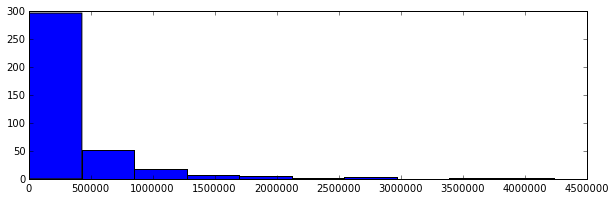

In [130]:
stations, counts = zip(*final_counts)
stations[:5], counts[:5]
plt.figure(figsize = (10,3))
plt.hist(counts)

And for good measure, the bar chart as well:

<Container object of 384 artists>

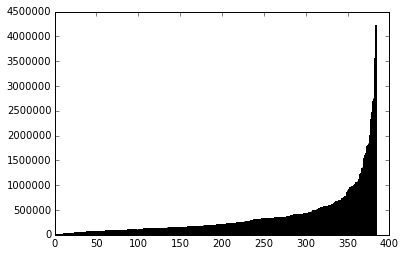

In [131]:
plt.bar(range(len(counts)), counts)

Hope you enjoyed my explorations!